# Project: Sales Prediction

# 1.Linear regression
Coding một class Hồi Quy Tuyến Tính

In [1]:
import numpy as np
class CustomLinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.num_samples = X_data.shape[0] # số dòng dữ liệu
        self.X_data = np.c_[np.ones((self.num_samples, 1)), X_data] # thêm 1 cột giá trị 1 vào đầu mỗi dòng dữ liệu
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_features = self.X_data.shape[1] # số lượng cột(feature) trong tập data

        # Initial weights
        # tạo bộ dữ liệu trọng số theta(ngẫu nhiên)
        self.theta = np.random.randn(self.X_data.shape[1], 1)
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)**2
        loss = np.mean(loss)
        return loss

    def predict(self, X_data): # tính tích vô hướng của tập dữ liệu & bộ dữ liệu theta
        if X_data.shape[1] == self.num_features:
            # nếu X_data đã được thêm cột giá trị 1 ở đầu dòng
            y_pred = X_data.dot(self.theta)
        else:
            #nếu X_data chưa được thêm cột giá trị 1 ở đầu dòng
            X_data = np.c_[np.ones((X_data.shape[0], 1)), X_data]
            y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self): # quá trình huấn luyện mô hình
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            loss_grd = 2*(y_pred-self.y_target)/self.num_samples
            gradients = self.X_data.T.dot(loss_grd)

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            if (epoch % 50) == 0: #in trạng thái ở mỗi 50 lần huấn luyện
                print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [6]:
# Câu hỏi 4 Cho giá trị y_pred và y như sau dựa vào hàm r2score được định nghĩa ở câu 3, tính các giá trị r2score tương ứng sau đây:
from sklearn.metrics import r2_score as r2score

# Case 1
y_pred = np.array([1 , 2, 3, 4, 5])
y = np.array([1 , 2, 3, 4, 5])
r2score(y_pred, y)

1.0

In [7]:
# Case 2
y_pred = np.array([1 , 2, 3, 4, 5])
y = np.array([3 , 5, 5, 2, 4])
r2score(y_pred, y)

-1.2000000000000002

# 2.Polynomial Regression
Hoàn thành đoạn code để tạo các polynomial feature từ một dữ liệu đầu vào

In [8]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_mem = []
    for X_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
        for d in range(2, degree+1):
            X_new = np.c_[X_new, np.power(X_sub, d)]
        X_mem.extend(X_new.T)
    return np.c_[X_mem].T

# 3.Sales Prediction


## a. Load dataset
Bộ dữ liệu dự đoán giá quảng cáo của các chiến dịch khác nhau (file SalesPrediction.csv)

In [9]:
# https://drive.google.com/file/d/1A8kK0IEsT3w8htzU18ihFr5UV-euhquC/view

%cd /content/drive/MyDrive/Colab/4.Sales_Prediction/data
!gdown 1A8kK0IEsT3w8htzU18ihFr5UV-euhquC

/content/drive/MyDrive/Colab/4.Sales_Prediction/data
Downloading...
From: https://drive.google.com/uc?id=1A8kK0IEsT3w8htzU18ihFr5UV-euhquC
To: /content/drive/MyDrive/Colab/4.Sales_Prediction/data/SalesPrediction.csv
100% 206k/206k [00:00<00:00, 55.4MB/s]


In [10]:
%cd ..

/content/drive/MyDrive/Colab/4.Sales_Prediction


In [11]:
import pandas as pd
df = pd.read_csv('data/SalesPrediction.csv')

In [12]:
# Dữ liệu bài toán dự đoán giá quảng cáo.
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


## b. Preprocessing
Trong đó trường thuộc tính Influencer thuộc kiểu dữ liệu text (các nhãn) - category. Vì vậy, sử dụng one-hot encoding để mã hoá dữ liệu dạng nhãn thành số hoặc vector để xử lý trường thuộc tính này

In [14]:
# kiểm tra kiểu dữ liệu của tập data (đảm bảo các số liệu ở dạng số & không được null)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [17]:
# thống kê số lượng giá trị null tương ứng các cột trong tập dữ liệu
df.isnull().sum()

,0
TV,10
Radio,4
Social Media,6
Influencer,0
Sales,6


In [18]:
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [19]:
# mã hoá thông tin cho Influencer. (theo phương pháp One Hot Encoding)
df = pd.get_dummies(df)

In [20]:
# Dữ liệu sau khi mã hoá thông tin cho Influencer
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,False,True,False,False
1,13.0,9.237765,2.409567,46.677897,False,True,False,False
2,41.0,15.886446,2.913410,150.177829,False,True,False,False
3,83.0,30.020028,6.922304,298.246340,False,True,False,False
4,15.0,8.437408,1.405998,56.594181,False,False,True,False


In [24]:
df.mean()

,0
TV,54.066857
Radio,18.160356
Social Media,3.323956
Sales,192.466602
Influencer_Macro,0.245407
Influencer_Mega,0.253281
Influencer_Micro,0.252187
Influencer_Nano,0.249125


In [21]:
# Handle Null values
# các giá trị Null sẽ được thay thế bởi giá trị trung bình cho mỗi thuộc tính
df = df.fillna(df.mean())

In [23]:
# thống kê lại số lượng giá trị null tương ứng các cột trong tập dữ liệu
df.isnull().sum()

,0
TV,0
Radio,0
Social Media,0
Sales,0
Influencer_Macro,0
Influencer_Mega,0
Influencer_Micro,0
Influencer_Nano,0


### Đánh giá tập dữ liệu

In [25]:
# kiểm tra mức độ tương quan giữa các feature
df.corr()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
TV,1.000000,0.866885,0.527010,0.996652,0.021335,-0.012630,-0.004863,-0.003645
Radio,0.866885,1.000000,0.606793,0.867369,0.009518,-0.005071,0.004212,-0.008601
Social Media,0.527010,0.606793,1.000000,0.528121,0.011631,0.013072,-0.013312,-0.011351
Sales,0.996652,0.867369,0.528121,1.000000,0.019267,-0.011701,-0.004099,-0.003289
Influencer_Macro,0.021335,0.009518,0.011631,0.019267,1.000000,-0.332131,-0.331171,-0.328482
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.011701,-0.332131,1.000000,-0.338211,-0.335465
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.004099,-0.331171,-0.338211,1.000000,-0.334495
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.003289,-0.328482,-0.335465,-0.334495,1.000000


<Axes: >

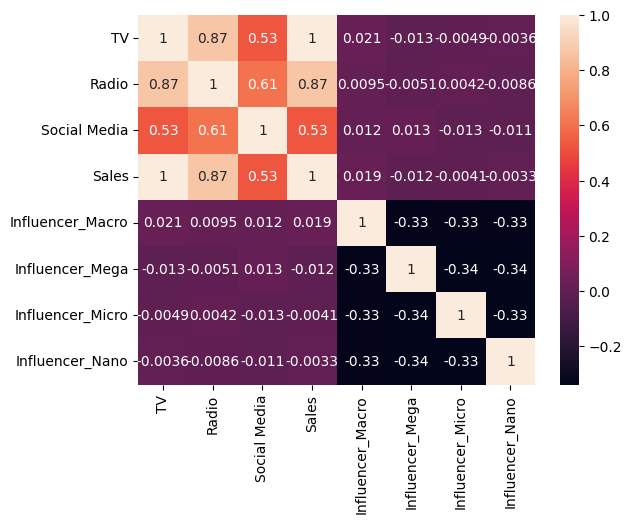

In [30]:
# biểu diễn mức độ tương quan giữa các feature bằng heatmap
import seaborn as sns
#import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)

<Axes: >

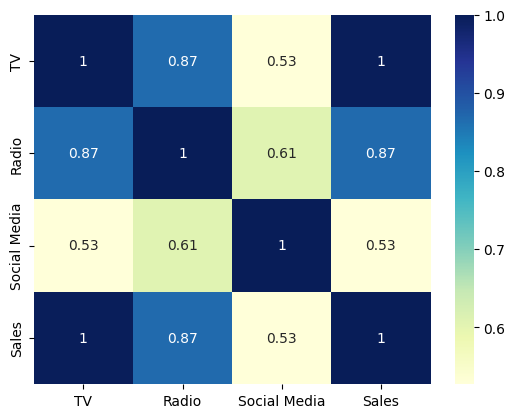

In [31]:
new_df = df[['TV', 'Radio', 'Social Media', 'Sales']]
sns.heatmap(new_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)

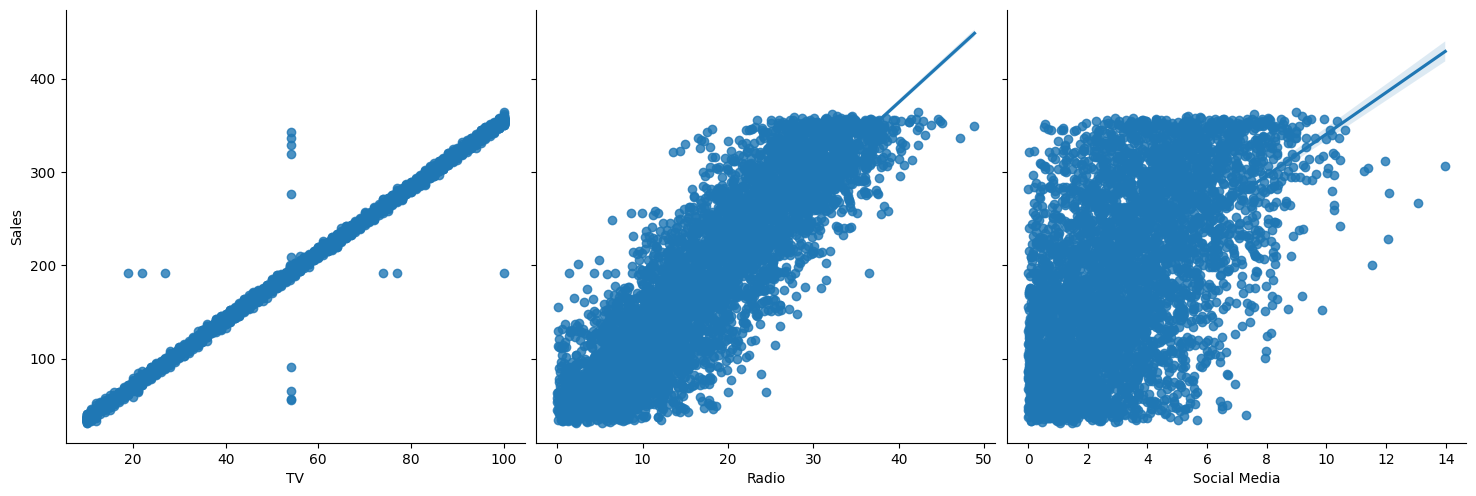

In [32]:
sns.pairplot(data = df,
    x_vars = ['TV', 'Radio', 'Social Media'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)

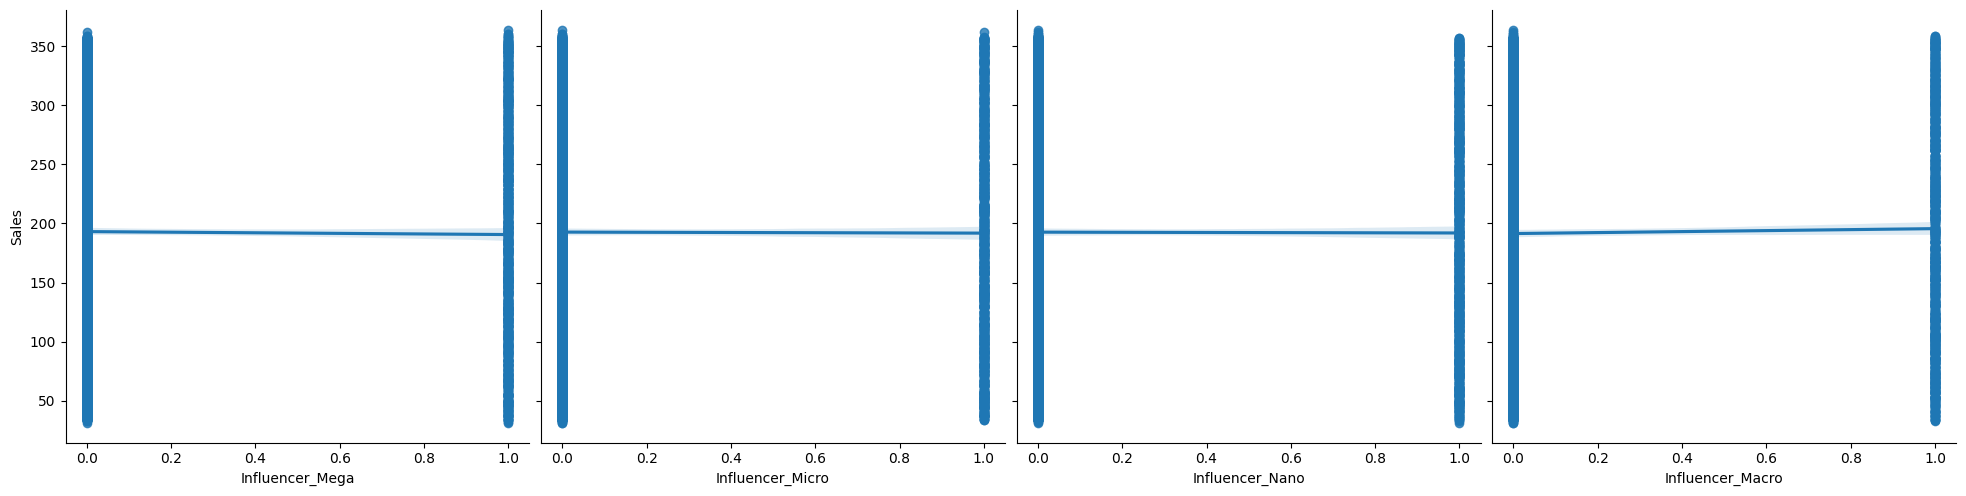

In [34]:
sns.pairplot(data = df,
    x_vars = ['Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Influencer_Macro'],
    y_vars = 'Sales',
    height = 5,
    kind = 'reg'
)

### Chia tập dữ liệu

In [54]:
# show columns of dataset
# Get features
df.columns

Index(['TV', 'Radio', 'Social Media', 'Sales', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

In [36]:
# X = df.drop('Sales', axis=1)
X = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano']]

In [37]:
X.head()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,False,True,False,False
1,13.0,9.237765,2.409567,False,True,False,False
2,41.0,15.886446,2.913410,False,True,False,False
3,83.0,30.020028,6.922304,False,True,False,False
4,15.0,8.437408,1.405998,False,False,True,False


In [45]:
y = df[['Sales']]

In [46]:
y.head()

,Sales
0,54.732757
1,46.677897
2,150.177829
3,298.246340
4,56.594181


In [59]:
# Train Test Split
# chia thành 2 tập train : test với tập test 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [52]:
X_train.shape, y_train.shape

((3200, 7), (3200, 1))

In [53]:
X_test.shape, y_test.shape

((1372, 7), (1372, 1))

## c. Feature Scaling
sử dụng StandardScaler để chuẩn hoá các đặc trưng

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_processed = scaler.fit_transform(X_train)

In [61]:
scaler.scale_

array([26.0602579 ,  9.62806595,  2.21765947,  0.43173288,  0.43381083,
        0.43305981,  0.43343598])

In [62]:
scaler.mean_

array([54.17357772, 18.22801905,  3.33704144,  0.24779628,  0.25138753,
        0.25008162,  0.25073457])

In [63]:
scaler.mean_[0]

54.173577723283785

In [64]:
#X_test_processed = scaler.fit_transform(X_test)
X_test_processed = scaler.transform(X_test)

In [65]:
X_test_processed

array([[-0.35201408, -0.11430114, -0.84511838, ..., -0.57948652,
         1.73167391, -0.57848122],
       [ 0.76079148,  1.17283689, -0.45267728, ..., -0.57948652,
        -0.57747593,  1.72866459],
       [ 1.14451754,  1.04152015,  1.06551646, ...,  1.72566569,
        -0.57747593, -0.57848122],
       ...,
       [ 0.95265451,  1.11777602,  1.06847889, ...,  1.72566569,
        -0.57747593, -0.57848122],
       [-0.42875929, -0.32526069,  1.2005403 , ...,  1.72566569,
        -0.57747593, -0.57848122],
       [-0.92760317, -1.25733468, -0.32928182, ...,  1.72566569,
        -0.57747593, -0.57848122]])

### Train bằng model CustomLinearRegression

In [66]:
linear_model = CustomLinearRegression(X_train_processed, y_train, learning_rate=0.1, num_epochs=250)
linear_model.fit()

Epoch: 0 - Loss: 45509.871040675636
Epoch: 50 - Loss: 101.77560046168311
Epoch: 100 - Loss: 68.56210133215434
Epoch: 150 - Loss: 65.98232640555337
Epoch: 200 - Loss: 65.78186139805017


{'loss': 570.0092601242422,
 'weight': array([[ 1.92950605e+02],
        [ 9.10225524e+01],
        [ 1.85269391e+00],
        [ 1.77569952e-01],
        [-2.64936949e-02],
        [ 2.08040600e-01],
        [ 2.06981213e-01],
        [ 1.91527654e-01]])}

In [67]:
preds = linear_model.predict(X_test_processed)

In [69]:
r2_score(y_test, preds)

0.9952604147418807

### Train bằng model LinearRegression (thư viện sklearn)

In [70]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_processed, y_train)

LinearRegression()

In [71]:
preds = linear_model.predict(X_test_processed)
r2_score(y_test, preds)

0.9952672000833009

## d. Polynomial Features
Tạo ra các đặc trưng phi tuyết bằng cách sử dụng hàm định nghĩa trong phần 2 hoặc thông qua thư viện Sklearn

### Sử dụng hàm PolynomialFeatures trong thư viện Sklearn

In [72]:
# Sử dụng hàm PolynomialFeatures trong thư viện Sklearn
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train_processed)

In [74]:
X_train_poly.shape

(3063, 120)

In [73]:
X_test_poly = poly_features.transform(X_test_processed)

In [75]:
X_test_poly.shape

(1509, 120)

In [76]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [77]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

0.9938173523913203

###Sử dụng hàm PolynomialFeatures tự định nghĩa

In [84]:
X_train.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega',
       'Influencer_Micro', 'Influencer_Nano'],
      dtype='object')

In [86]:
# căn cứ vào ảnh tương quan giữa các feature bên trên, thì feature [Social Media] không phù hợp với hàm tuyến tính
# Do đó chúng ta sẽ chọn feature này để tạo các đặc trưng phi tuyến.
# feature nằm ở vị trí cột thứ 3 trong tập dữ liệu
X_train_processed[:, 2:3]

array([[-0.17228084],
       [-1.47661593],
       [-0.55865556],
       ...,
       [ 0.58649299],
       [-1.22645549],
       [-1.04859981]])

In [95]:
# tạo ra các đặc trưng phi tuyến bằng hàm create_polynomial_features đã code ở trên
x_train_poly = create_polynomial_features(X_train_processed[:, 2:3], degree=3)
x_train_poly

array([[-0.17228084,  0.02968069, -0.00511341],
       [-1.47661593,  2.18039462, -3.21960544],
       [-0.55865556,  0.31209604, -0.17435419],
       ...,
       [ 0.58649299,  0.34397403,  0.20173836],
       [-1.22645549,  1.50419307, -1.84482586],
       [-1.04859981,  1.09956157, -1.15300006]])

In [96]:
x_train_poly.shape

(3063, 3)

In [103]:
# ghép các feature vừa được tạo vào bộ dữ liệu training
X_train_poly = np.hstack((X_train_processed, x_train_poly[:, 1:]))
X_train_poly

array([[ 0.33869282, -0.3935435 , -0.17228084, ..., -0.57848122,
         0.02968069, -0.00511341],
       [-0.19852366, -0.28899849, -1.47661593, ..., -0.57848122,
         2.18039462, -3.21960544],
       [-0.42875929, -1.07436552, -0.55865556, ...,  1.72866459,
         0.31209604, -0.17435419],
       ...,
       [-1.61831007, -1.72922605,  0.58649299, ...,  1.72866459,
         0.34397403,  0.20173836],
       [-0.58224971, -0.91383556, -1.22645549, ..., -0.57848122,
         1.50419307, -1.84482586],
       [-1.27295662, -1.45779228, -1.04859981, ..., -0.57848122,
         1.09956157, -1.15300006]])

In [104]:
X_train_poly.shape

(3063, 9)

In [111]:
# tương tự cho bộ dữ liệu test
x_test_poly = create_polynomial_features(X_test_processed[:, 2:3], degree=3)
x_test_poly

array([[-0.84511838,  0.71422507, -0.60360473],
       [-0.45267728,  0.20491672, -0.09276114],
       [ 1.06551646,  1.13532532,  1.20970781],
       ...,
       [ 1.06847889,  1.14164713,  1.21982585],
       [ 1.2005403 ,  1.44129701,  1.73033514],
       [-0.32928182,  0.10842651, -0.03570288]])

In [112]:
x_test_poly.shape

(1509, 3)

In [113]:
X_test_poly = np.hstack((X_test_processed, x_test_poly[:, 1:]))
X_test_poly

array([[-0.35201408, -0.11430114, -0.84511838, ..., -0.57848122,
         0.71422507, -0.60360473],
       [ 0.76079148,  1.17283689, -0.45267728, ...,  1.72866459,
         0.20491672, -0.09276114],
       [ 1.14451754,  1.04152015,  1.06551646, ..., -0.57848122,
         1.13532532,  1.20970781],
       ...,
       [ 0.95265451,  1.11777602,  1.06847889, ..., -0.57848122,
         1.14164713,  1.21982585],
       [-0.42875929, -0.32526069,  1.2005403 , ..., -0.57848122,
         1.44129701,  1.73033514],
       [-0.92760317, -1.25733468, -0.32928182, ..., -0.57848122,
         0.10842651, -0.03570288]])

In [114]:
X_test_poly.shape

(1509, 9)

In [109]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [115]:
preds = linear_model.predict(X_test_poly)
r2_score(y_test, preds)

0.995254800058493